# CAR EMISSION PREDICTION

In [1]:
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("CanadaCarEmissions.xlsx")

In [3]:
df.head()#shows 6 extra columns called unnamed 15 16 17 18 19 20, and first row has all NaN value

#deleting only first row needs to be run only once
df.drop(0, inplace=True)

#deleting columns cotaining 'unnamed' (not case sensitive ) in their heading, needs to be run only once, hence commented
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], inplace=True, axis=1)

## ANSWER 1 ##
# There are a total of 15 attributes in this dataset described below:
# Model year                   : the year in which the car model was manufactured
# Make                         : the car company that manifactured the vehicle
# Model                        : the model name of the car
# Vehicle class                : the category (size/shape) of the car
# Engine Size                  : the engine capacity in litres
# Cylinders                    : the no. of cylinders the vehicle has
# Transmission                 : the transmission type of the vehicle
# Fuel Type                    : the type of fuel consumed by the vehicle 
# Fuel Consumption City        : the fuel consumed per 100 km, in litres on city roads (L/100)
# Fuel Consumption Hwy         : the fuel consumed per 100 km, in litres on highway roads (L/100)
# COMB                         : the fuel consumed per 100 km, in litres on highway and city roads combined (L/100)
# COMB                         : the combined mileage on city and highway roads in miles per gallon
# CO2 Emission                 : carbon dioxide emissions in grams per km
# CO2 Rating                   : the rating class of CO2 emissions, rated on a scale from 1 (worst) to 10 (best)
# SMOG Rating                  : emissions of smog-forming pollutants, rated on a scale from 1 (worst) to 10 (best)

In [4]:
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,NaN,NaN


In [5]:
df.info()

## ANSWER 2 ##
# There are missing values present in attributes, 'CO2 Rating' and 'Smog Rating.'
# CO2 rating has 18904 missing values.
# Smog rating has 20014 missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)           26075 non-null 

In [6]:
df['MODEL YEAR'].value_counts()

2015.0    1132
2016.0    1110
2009.0    1092
2018.0    1083
2012.0    1081
2008.0    1079
2011.0    1076
2017.0    1058
2013.0    1058
2019.0    1056
2007.0    1043
2014.0    1040
2010.0    1021
2005.0    1019
2020.0     968
2006.0     968
2022.0     955
2021.0     941
2004.0     898
1995.0     841
2003.0     820
2002.0     740
1996.0     698
1999.0     688
2001.0     679
1997.0     658
2000.0     639
1998.0     634
Name: MODEL YEAR, dtype: int64

In [7]:
df['MAKE'].value_counts()

CHEVROLET     2094
FORD          1660
BMW           1621
GMC           1602
DODGE         1097
              ... 
ALFA ROMEO      10
Bugatti          9
SRT              4
GENESIS          4
BUGATTI          3
Name: MAKE, Length: 90, dtype: int64

In [8]:
df["VEHICLE CLASS"].value_counts()
## ANSWER 3 ##
# In our chosen dataset, the attribute, 'VEHICLE CLASS' is categorical data.
# The method value_counts() displays the unique instances and their occurrences in a specified column(attribute). 

COMPACT                     3207
SUV                         3036
MID-SIZE                    2715
PICKUP TRUCK - STANDARD     2278
SUBCOMPACT                  2066
FULL-SIZE                   1256
TWO-SEATER                  1106
SUV: Small                   929
MINICOMPACT                  858
SUV - SMALL                  827
STATION WAGON - SMALL        810
Mid-size                     660
SUV: Standard                608
MINIVAN                      556
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
PICKUP TRUCK - SMALL         470
VAN - CARGO                  469
STATION WAGON - MID-SIZE     466
Subcompact                   451
Full-size                    417
VAN - PASSENGER              386
Two-seater                   313
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size       44
Minivan   

In [9]:
df['TRANSMISSION'].value_counts()

A4      5491
M5      3219
AS6     2836
M6      2672
A6      1965
AS8     1733
A5      1604
AS5      870
AV       816
A8       794
AM7      689
AS7      614
A9       529
AS10     335
A7       278
AS4      258
AM6      214
A3       187
AM8      164
A10      162
AV7      143
AV6      137
M7       130
AS9      110
AV8       78
AV10      25
AV1        8
AM5        6
AM9        5
M4         3
Name: TRANSMISSION, dtype: int64

In [10]:
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,7171.000000,6061.000000
mean,2009.576031,3.355448,5.844257,13.036272,9.162991,11.294082,26.784314,256.679003,4.659880,4.674311
std,7.725814,1.342021,1.796767,3.560212,2.398400,2.997495,7.306594,63.062087,1.638001,1.791209
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,10.600000,7.500000,9.200000,22.000000,212.500000,4.000000,3.000000
50%,2010.000000,3.000000,6.000000,12.600000,8.700000,10.800000,26.000000,248.000000,5.000000,5.000000
75%,2016.000000,4.200000,8.000000,15.100000,10.500000,13.000000,31.000000,297.000000,6.000000,6.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000,10.000000,8.000000


In [11]:
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,NaN,NaN


### Missing Values

In [12]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mean(), inplace = True)
df['Smog Rating'].fillna(df['Smog Rating'].mean(), inplace = True)
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,4.65988,4.674311
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,4.65988,4.674311
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,4.65988,4.674311
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,4.65988,4.674311
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,4.65988,4.674311


## Exploratory Data Analysis (EDA)

### Plotting Histogram for Continuous Varibales

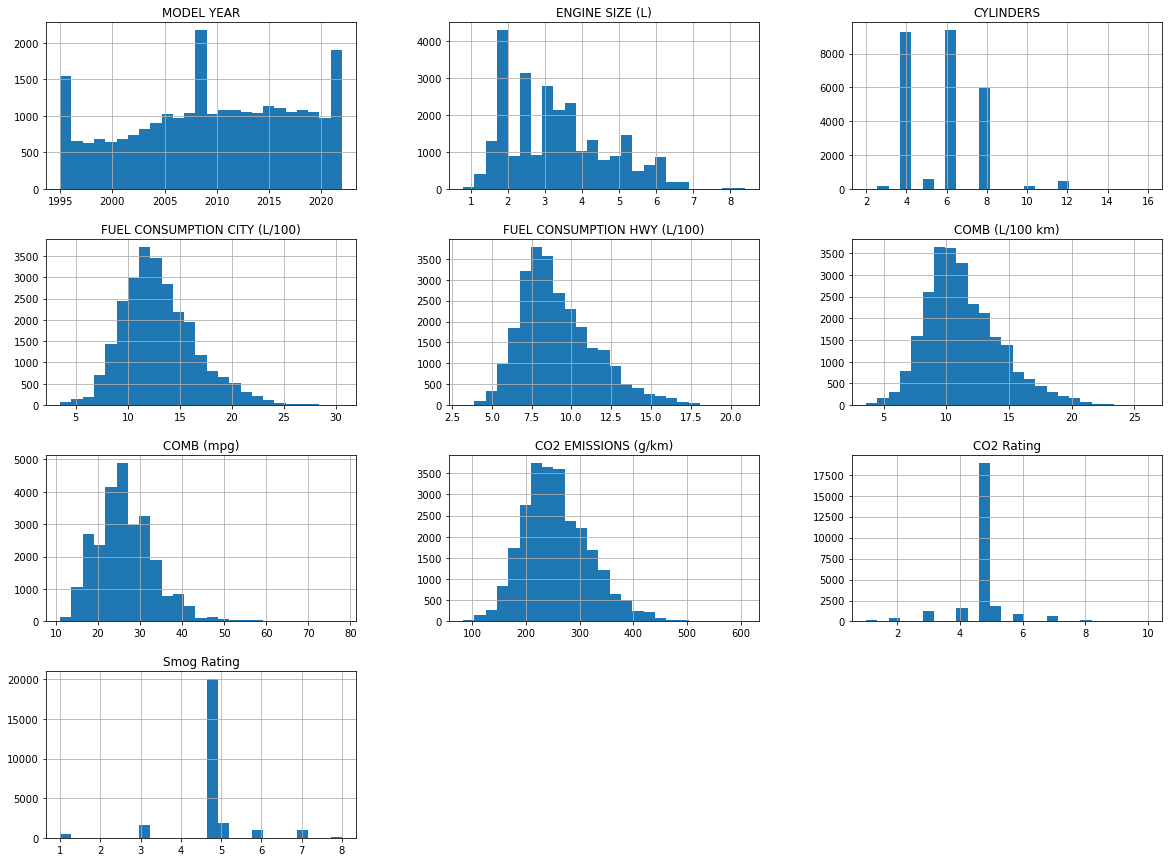

In [13]:
df.hist(bins=25, figsize=(20,15))
plt.show()
## ANSWER 4 ##
# The fuel consumed per 100 km is more on city roads than on highway roads.
# The majority of cars either have 4, 6 or 8 cylinders.
# Engine sizes a bit less than 2 litres are the most common.

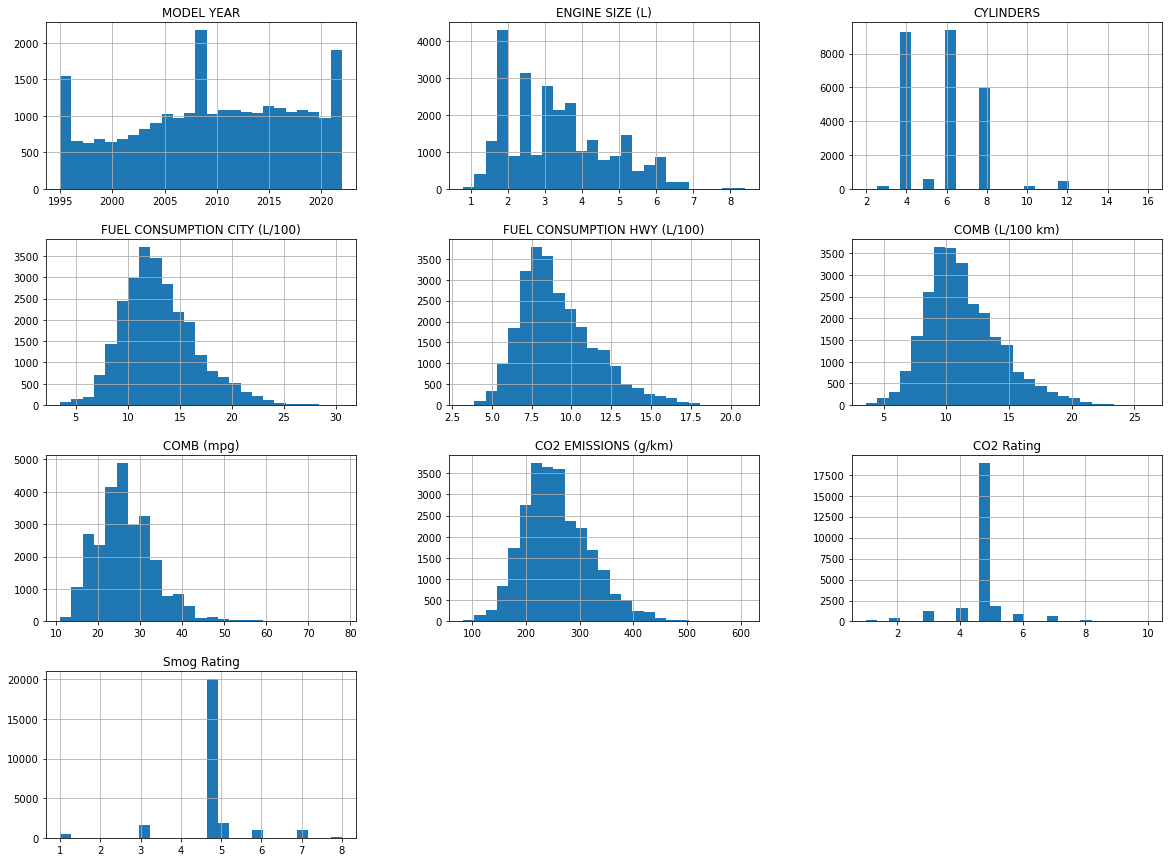

In [14]:
df.hist(bins=25, figsize=(20,15))
plt.show()
## ANSWER 4 ##
# The fuel consumed per 100 km is more on city roads than on highway roads.
# The majority of cars either have 4, 6 or 8 cylinders.
# Engine sizes a bit less than 2 litres are the most common.

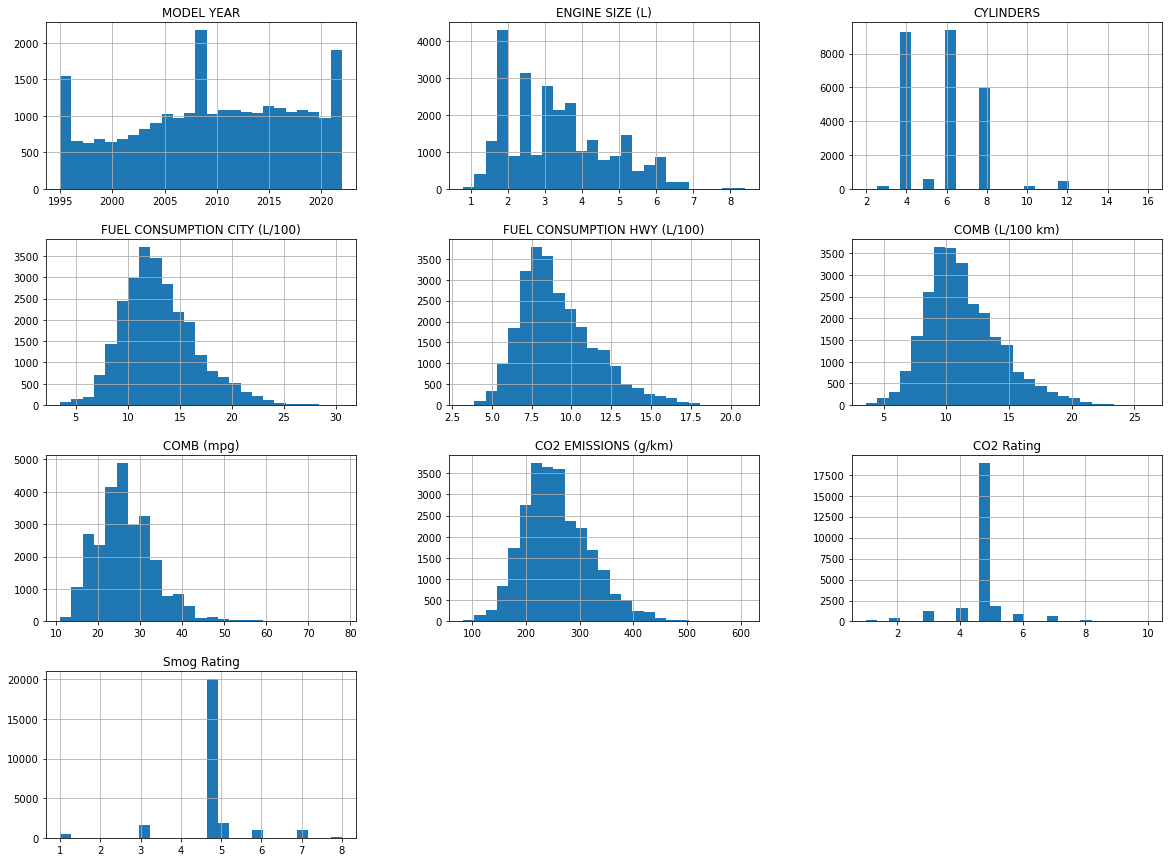

In [15]:
df.hist(bins=25, figsize=(20,15))
plt.show()
## ANSWER 4 ##
# The fuel consumed per 100 km is more on city roads than on highway roads.
# The majority of cars either have 4, 6 or 8 cylinders.
# Engine sizes a bit less than 2 litres are the most common.

<AxesSubplot:xlabel='ENGINE SIZE (L)', ylabel='CO2 EMISSIONS (g/km)'>

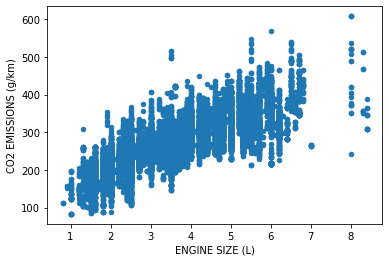

In [16]:
df.plot(kind="scatter", x="ENGINE SIZE (L)", y="CO2 EMISSIONS (g/km)")

<AxesSubplot:xlabel='ENGINE SIZE (L)', ylabel='CO2 EMISSIONS (g/km)'>

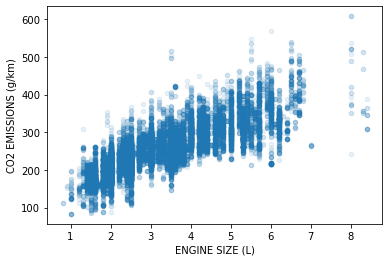

In [17]:
df.plot(kind="scatter", x="ENGINE SIZE (L)", y="CO2 EMISSIONS (g/km)", alpha=0.1)

### We can observe that a passenger van vehicle emits the highest CO2 emissions on an average, whereas a compact vehicle emits the lowest.

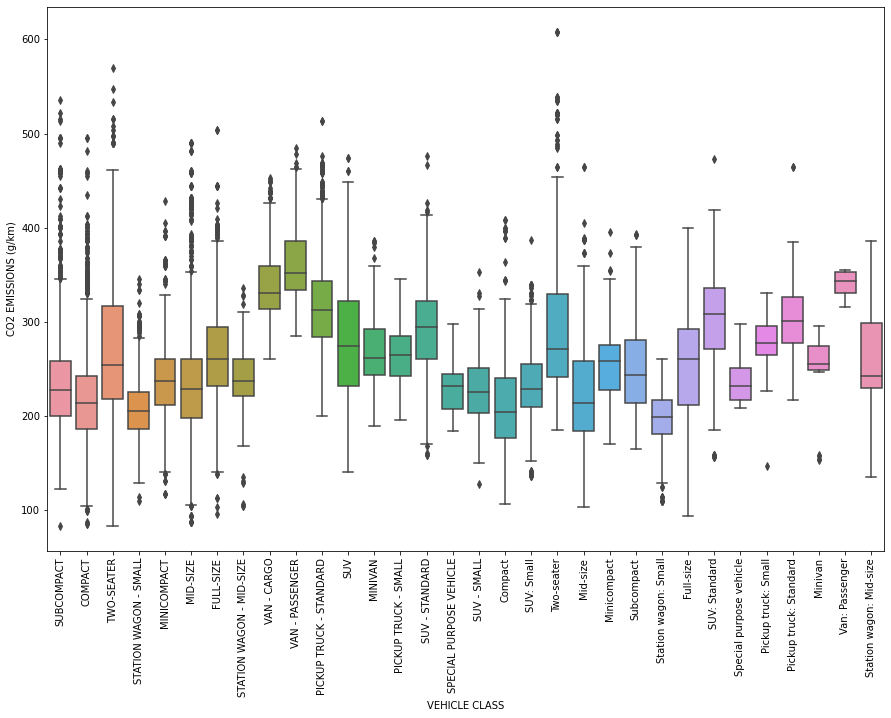

In [18]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'VEHICLE CLASS', y = 'CO2 EMISSIONS (g/km)')
plt.xticks(rotation = 90)
plt.show()

### We can infer that automatic transmission vehicles have higher emissions as compared to manual and continuosly variable type vehicles.

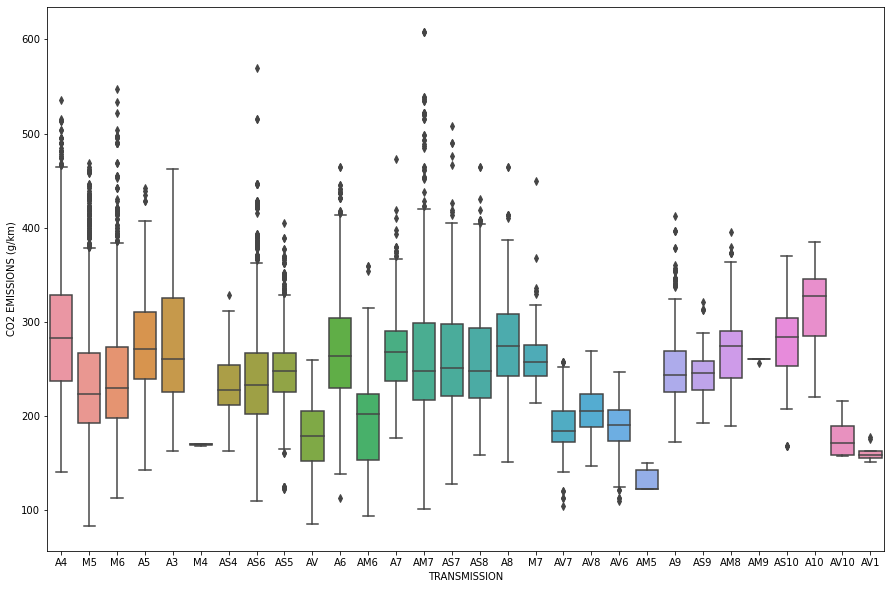

In [19]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'TRANSMISSION', y = 'CO2 EMISSIONS (g/km)')
plt.show()

### We cannot infer much from this boxplot, but overall, we can see that a vehicle with Natural Gas fuel type has higher CO2 than the rest.

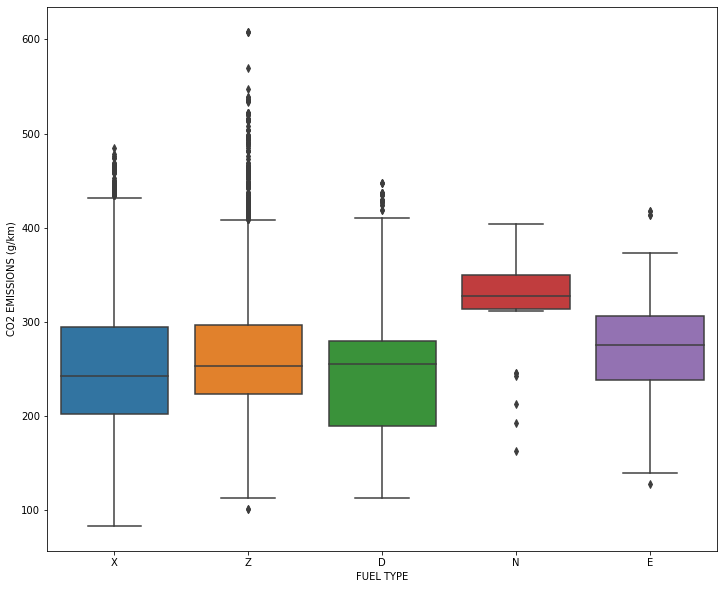

In [20]:
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'FUEL TYPE', y = 'CO2 EMISSIONS (g/km)')
plt.show()

# CORRELATION

In [21]:
corr_matrix = df.corr()

In [22]:
corr_matrix["CO2 EMISSIONS (g/km)"].sort_values(ascending=False)
## ANSWER 6 ##
# We have done a correlation of all attributes with CO2 emission attribute.
# The 4 most corelated attributes are COMB(L/100), Fuel Consumption city, Fuel COnsumption HWY and COMB (mpg)
# We aren't including CO2 rating as we need to predict its values later on.

CO2 EMISSIONS (g/km)             1.000000
COMB (L/100 km)                  0.935492
FUEL CONSUMPTION CITY (L/100)    0.927856
FUEL CONSUMPTION HWY (L/100)     0.914104
ENGINE SIZE (L)                  0.798527
CYLINDERS                        0.766113
MODEL YEAR                      -0.205244
Smog Rating                     -0.206322
CO2 Rating                      -0.471736
COMB (mpg)                      -0.900366
Name: CO2 EMISSIONS (g/km), dtype: float64

<AxesSubplot:>

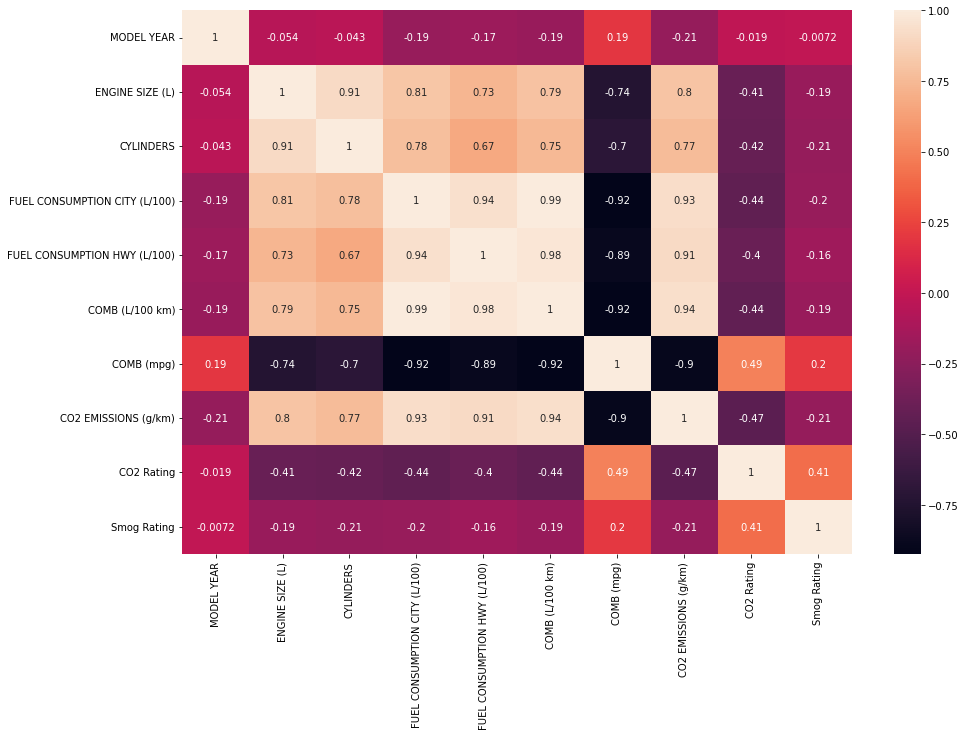

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

### We observe that there is high multicollinearity between 'COMB (L/100 km)', 'FUEL CONSUMPTION CITY (L/100)' and 'FUEL CONSUMPTION HWY (L/100)' attributes. So we will only keep column 'COMB (L/100 km)'.

In [24]:
from pandas.plotting import scatter_matrix

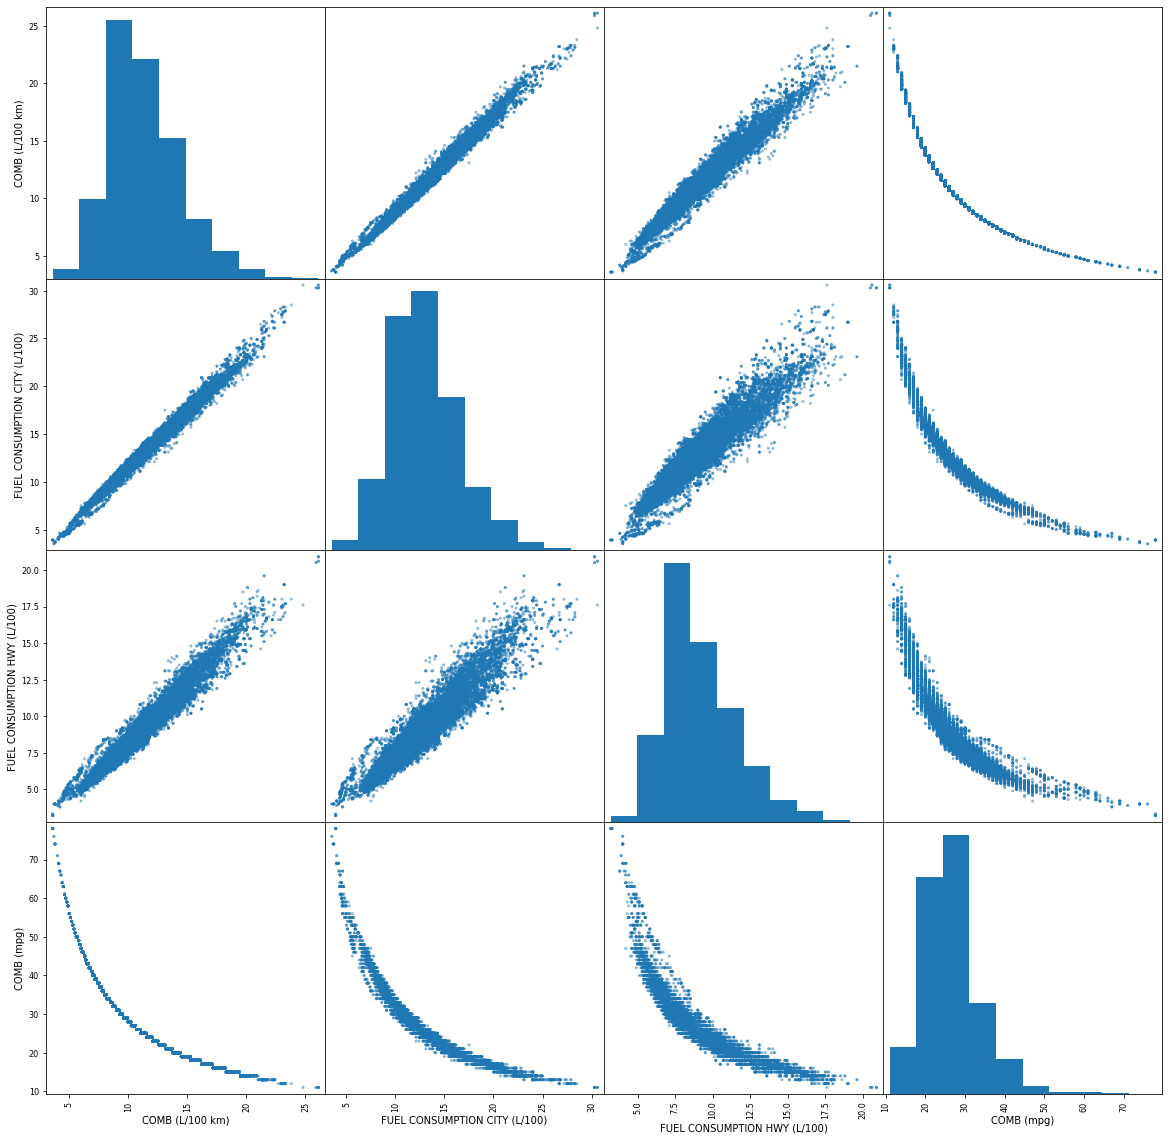

In [25]:
attributes = ["COMB (L/100 km)", "FUEL CONSUMPTION CITY (L/100)", "FUEL CONSUMPTION HWY (L/100)",
              "COMB (mpg)"]
scatter_matrix(df[attributes], figsize=(20, 20))
plt.show()

# Feature Engineering

#### Frequency Encoding 'MAKE' Attribute

In [26]:
y_make = df.groupby('MAKE').size()/len(df)
df['MAKE_NEW'] = df['MAKE'].apply(lambda x_make : y_make[x_make])
df.drop(['MAKE'], axis=1, inplace=True)

In [27]:
df['MAKE_NEW'].head()

1    0.009588
2    0.009588
3    0.009588
4    0.009588
5    0.009588
Name: MAKE_NEW, dtype: float64

#### Frequency Encoding 'MODEL' Attribute

In [28]:
y_model = df.groupby('MODEL(# = high output engine)').size()/len(df)
df['MODEL_NEW'] = df['MODEL(# = high output engine)'].apply(lambda x_model : y_model[x_model])
df.drop(['MODEL(# = high output engine)'], axis=1, inplace=True)

In [29]:
df['MODEL_NEW'].head()

1    0.000537
2    0.000537
3    0.000192
4    0.000038
5    0.000077
Name: MODEL_NEW, dtype: float64

#### One Hot Encoding 

1. 'Fuel Type Attribute'
2. 'VEHICLE CLASS'
3. 'TRANSMISSION'

In [30]:
Categorical_df = df[['FUEL TYPE','VEHICLE CLASS','TRANSMISSION']]
Categorical_df.reset_index(inplace=True)
Categorical_df.drop(['index'], axis=1, inplace = True)
Categorical_df.head()

/var/folders/pk/w02nyv7x67d_gpdyrsrfp5y40000gn/T/ipykernel_6355/1698836543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical_df.drop(['index'], axis=1, inplace = True)


,FUEL TYPE,VEHICLE CLASS,TRANSMISSION
0,X,SUBCOMPACT,A4
1,X,SUBCOMPACT,M5
2,Z,SUBCOMPACT,M5
3,Z,COMPACT,A4
4,Z,COMPACT,A4


In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

df_cat = pd.DataFrame(encoder.fit_transform(Categorical_df), columns=encoder.get_feature_names(Categorical_df.columns))
df_cat.head()

/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,VEHICLE CLASS_Compact,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_Full-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print(df_cat.shape)

(26075, 64)


In [33]:
df = pd.concat([df,df_cat], axis=1)
df.head()

,MODEL YEAR,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
1,1995.0,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1995.0,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1995.0,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1995.0,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1995.0,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
df.drop(['VEHICLE CLASS','TRANSMISSION','FUEL TYPE'], axis =1, inplace = True)
df.dropna(inplace=True)

In [35]:
df.head()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
1,1995.0,1.8,4.0,11.6,8.3,10.1,28.0,232.0,4.65988,4.674311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1995.0,1.8,4.0,11.0,8.3,9.8,29.0,225.0,4.65988,4.674311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1995.0,1.8,4.0,10.8,8.3,9.7,29.0,223.0,4.65988,4.674311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1995.0,3.2,6.0,14.2,10.5,12.5,23.0,288.0,4.65988,4.674311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1995.0,3.2,6.0,14.6,11.0,13.0,22.0,299.0,4.65988,4.674311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Columns To Drop

1. Model Year - Low Correaltion Value of -0.205244
2. FUEL CONSUMPTION CITY (L/100) - multicollinearity
3. FUEL CONSUMPTION HWY (L/100) - multicollinearity
4. COMB (mpg) - duplicate column
5. CO2 rating - as low correlation value of -0.47, where 72.5% were initially null values.
6. Smog rating - as low correlation valie of 0.41, where 77% were initially null values.

In [36]:
df.drop(['MODEL YEAR', 'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)', 'COMB (mpg)', 'Smog Rating'], axis=1, inplace=True)

### SPLITTING THE DATASET INTO TWO -

1. df1 - Class Variable = 'CO2 EMISSIONS (g/km)' (Regression)
2. df2 - Class Variable = 'CO2 Rating' (Classification)

# PART1 - REGRESSION Analysis

In [37]:
df.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS (g/km),CO2 Rating,MAKE_NEW,MODEL_NEW,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
1,1.8,4.0,10.1,232.0,4.65988,0.009588,0.000537,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.8,4.0,9.8,225.0,4.65988,0.009588,0.000537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.8,4.0,9.7,223.0,4.65988,0.009588,0.000192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.2,6.0,12.5,288.0,4.65988,0.009588,0.000038,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.2,6.0,13.0,299.0,4.65988,0.009588,0.000077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
dfreg = df.copy()
dfreg.drop(['CO2 Rating'], axis=1, inplace=True)
dfreg.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS (g/km),MAKE_NEW,MODEL_NEW,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
1,1.8,4.0,10.1,232.0,0.009588,0.000537,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.8,4.0,9.8,225.0,0.009588,0.000537,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.8,4.0,9.7,223.0,0.009588,0.000192,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.2,6.0,12.5,288.0,0.009588,0.000038,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.2,6.0,13.0,299.0,0.009588,0.000077,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
temp = dfreg[['CO2 EMISSIONS (g/km)']]
dfreg.drop('CO2 EMISSIONS (g/km)', axis=1, inplace=True)
dfreg = pd.concat([dfreg, temp], axis=1)
dfreg.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),MAKE_NEW,MODEL_NEW,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,VEHICLE CLASS_Compact,...,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,CO2 EMISSIONS (g/km)
1,1.8,4.0,10.1,0.009588,0.000537,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,232.0
2,1.8,4.0,9.8,0.009588,0.000537,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225.0
3,1.8,4.0,9.7,0.009588,0.000192,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0
4,3.2,6.0,12.5,0.009588,0.000038,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.0
5,3.2,6.0,13.0,0.009588,0.000077,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,299.0


In [40]:
X = dfreg.iloc[:,:69].values
y = dfreg.iloc[:,-1].values

### Splitting the dataset into Training and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20859, 69)
(20859,)
(5215, 69)
(5215,)


## Applying Regression Models

### Case1: Multiple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

### Case2: Decision Tree Regression

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Case3: Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

LinearRegression()

### Case4: Random Forest Reggresion 

In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Case5: Support Vector Regression (SVR)

In [48]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)

SVR()

## Evaluating the Model Performance

### Case1: Multiple Linear Regression

In [49]:
y_pred = regressor_mlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[221.91 218.  ]
 [235.21 237.  ]
 [222.22 234.  ]
 ...
 [174.55 162.  ]
 [240.88 249.  ]
 [229.75 237.  ]]


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9041845694811447

In [51]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor_mlr, X = X_train, y = y_train, cv = 10)
print("R2: {:.2f}".format(r2.mean()))
print("Standard Deviation: {:.2f}".format(r2.std()*100))

R2: 0.90
Standard Deviation: 0.98


### Case2: Decision Tree Regression

In [52]:
y_pred = regressor_dtr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[218. 218.]
 [237. 237.]
 [234. 234.]
 ...
 [162. 162.]
 [249. 249.]
 [237. 237.]]


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9805837379725089

In [54]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor_dtr, X = X_train, y = y_train, cv = 10)
print("R2: {:.2f}".format(r2.mean()))
print("Standard Deviation: {:.2f}".format(r2.std()*100))

R2: 0.97
Standard Deviation: 0.59


### Case3: Polynomial Regression

In [55]:
y_pred = regressor_poly.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[227.17 218.  ]
 [242.14 237.  ]
 [227.9  234.  ]
 ...
 [143.03 162.  ]
 [247.23 249.  ]
 [234.65 237.  ]]


In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1695812301817685.2

In [57]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor_poly, X = X_train, y = y_train, cv = 10)
print("R2: {:.2f}".format(r2.mean()))
print("Standard Deviation: {:.2f}".format(r2.std()*100))

R2: 0.90
Standard Deviation: 0.98


### Case4: Random Forest Reggresion 

In [58]:
y_pred = regressor_rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[217.6 218. ]
 [237.6 237. ]
 [233.2 234. ]
 ...
 [162.  162. ]
 [248.1 249. ]
 [237.  237. ]]


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9866458513572308

In [60]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor_rfr, X = X_train, y = y_train, cv = 10)
print("R2: {:.2f}".format(r2.mean()))
print("Standard Deviation: {:.2f}".format(r2.std()*100))

R2: 0.98
Standard Deviation: 0.34


### Case5: Support Vector Regression (SVR)

In [61]:
y_pred = regressor_svr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[232.09 218.  ]
 [243.12 237.  ]
 [242.2  234.  ]
 ...
 [146.22 162.  ]
 [244.99 249.  ]
 [240.38 237.  ]]


In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8272655809291488

In [63]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train, cv = 10)
print("R2: {:.2f}".format(r2.mean()))
print("Standard Deviation: {:.2f}".format(r2.std()*100))

R2: 0.82
Standard Deviation: 1.31


# PART2 - CLASSIFICATION Analysis

In [64]:
dfclf = df.copy()
dfclf.drop(dfclf.index[0:18904],axis=0, inplace=True)
dfclf.drop(['CO2 EMISSIONS (g/km)'], axis=1, inplace=True)
dfclf.reset_index(inplace=True)
dfclf.drop('index', axis=1, inplace=True)

In [65]:
dfclf.shape

(7170, 70)

In [66]:
dfclf.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 Rating,MAKE_NEW,MODEL_NEW,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,2.4,4.0,8.1,7.0,0.009588,0.000499,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,6.0,11.1,5.0,0.009588,0.000268,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,6.0,10.7,5.0,0.009588,0.000077,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.5,6.0,10.7,5.0,0.009588,0.000307,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,6.0,10.0,5.0,0.009588,0.000115,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
dfclf['CO2 Rating'].value_counts()

5.0     1888
4.0     1634
3.0     1237
6.0      918
7.0      654
2.0      383
8.0      180
1.0      138
9.0       86
10.0      52
Name: CO2 Rating, dtype: int64

In [68]:
temp = dfclf[['CO2 Rating']]
dfclf.drop('CO2 Rating', axis=1, inplace=True)
dfclf = pd.concat([dfclf, temp], axis=1)
dfclf.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),MAKE_NEW,MODEL_NEW,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,VEHICLE CLASS_Compact,...,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,CO2 Rating
0,2.4,4.0,8.1,0.009588,0.000499,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,3.5,6.0,11.1,0.009588,0.000268,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3.5,6.0,10.7,0.009588,0.000077,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,3.5,6.0,10.7,0.009588,0.000307,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,3.5,6.0,10.0,0.009588,0.000115,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [69]:
X = dfclf.iloc[:,:69].values
y = dfclf.iloc[:,-1].values

### Splitting the dataset into Training and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5736, 69)
(5736,)
(1434, 69)
(1434,)


## Applying Classification Models

### Case1: SVM Classification

In [73]:
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0)
classifier_svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [74]:
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_svm_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.24 %
Standard Deviation: 1.72 %


#### Grid Search CV - To find the optimum hyperparameters

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier_svm_rbf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.24 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


#### Linear SVM

In [77]:
prediction = classifier_svm_linear.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 79.24 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.66      0.96      0.78        24
         2.0       0.68      0.53      0.60        68
         3.0       0.74      0.73      0.74       252
         4.0       0.79      0.79      0.79       331
         5.0       0.88      0.90      0.89       378
         6.0       0.85      0.84      0.84       194
         7.0       0.78      0.84      0.81       126
         8.0       0.64      0.54      0.58        26
         9.0       0.57      0.60      0.59        20
        10.0       0.58      0.47      0.52        15

    accuracy                           0.80      1434
   macro avg       0.72      0.72      0.71      1434
weighted avg       0.80      0.80      0.80      1434


 confussion matrix:
 [[ 23   1   0   0   0   0   0   0   0   0]
 [  6  36  26   0   0   0   0   0   0   0]
 [  6  15 184  47   0   0   0   0   0   0]
 [  0   1  36 260  34   0   0   0   0   0]
 [

#### Kernel Rbf SVM

In [78]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm_rbf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 63.01 %
Standard Deviation: 2.29 %


In [79]:
prediction = classifier_svm_rbf.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 63.01 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.81      0.71      0.76        24
         2.0       0.55      0.31      0.40        68
         3.0       0.71      0.71      0.71       252
         4.0       0.68      0.72      0.70       331
         5.0       0.72      0.78      0.75       378
         6.0       0.60      0.62      0.61       194
         7.0       0.55      0.67      0.60       126
         8.0       1.00      0.04      0.07        26
         9.0       0.33      0.05      0.09        20
        10.0       0.25      0.07      0.11        15

    accuracy                           0.67      1434
   macro avg       0.62      0.47      0.48      1434
weighted avg       0.66      0.67      0.65      1434


 confussion matrix:
 [[ 17   7   0   0   0   0   0   0   0   0]
 [  4  21  41   0   2   0   0   0   0   0]
 [  0  10 179  63   0   0   0   0   0   0]
 [  0   0  30 238  61   1   1   0   0   0]
 [

### Case2: Random Forest Classification

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rfr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [81]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rfr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.90 %
Standard Deviation: 1.84 %


In [82]:
prediction = classifier_rfr.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 81.90 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.88      0.88      0.88        24
         2.0       0.72      0.79      0.76        68
         3.0       0.84      0.86      0.85       252
         4.0       0.83      0.83      0.83       331
         5.0       0.90      0.88      0.89       378
         6.0       0.84      0.86      0.85       194
         7.0       0.81      0.79      0.80       126
         8.0       0.75      0.58      0.65        26
         9.0       0.69      0.90      0.78        20
        10.0       0.89      0.53      0.67        15

    accuracy                           0.84      1434
   macro avg       0.81      0.79      0.79      1434
weighted avg       0.84      0.84      0.84      1434


 confussion matrix:
 [[ 21   3   0   0   0   0   0   0   0   0]
 [  3  54  11   0   0   0   0   0   0   0]
 [  0  16 216  20   0   0   0   0   0   0]
 [  0   2  31 275  23   0   0   0   0   0]
 [

In [83]:
prediction_proba = classifier_rfr.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.9706307265577129

### Case3: Naive Bayes

### Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
classifier_gaussian_bayes = GaussianNB()
classifier_gaussian_bayes.fit(X_train, y_train)

GaussianNB()

In [85]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_gaussian_bayes, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 6.52 %
Standard Deviation: 0.57 %


In [86]:
prediction = classifier_gaussian_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 6.52 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.04      0.96      0.08        24
         2.0       0.10      0.18      0.12        68
         3.0       0.50      0.01      0.02       252
         4.0       0.12      0.00      0.01       331
         5.0       1.00      0.02      0.04       378
         6.0       0.19      0.02      0.04       194
         7.0       0.20      0.01      0.02       126
         8.0       0.03      0.19      0.06        26
         9.0       0.02      0.35      0.04        20
        10.0       0.05      0.67      0.10        15

    accuracy                           0.05      1434
   macro avg       0.23      0.24      0.05      1434
weighted avg       0.43      0.05      0.03      1434


 confussion matrix:
 [[ 23   1   0   0   0   0   0   0   0   0]
 [ 56  12   0   0   0   0   0   0   0   0]
 [187  38   2   2   0   0   2   3  18   0]
 [172  53   0   1   0   0   0  17  88   0]
 [ 

In [88]:
prediction_proba = classifier_gaussian_bayes.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.6947619946931946

### Multinomial Naive Bayes

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
classifier_multinomial_bayes = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
classifier_multinomial_bayes.fit(X_train, y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [91]:
prediction = classifier_multinomial_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 6.52 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.36      0.21      0.26        24
         2.0       1.00      0.06      0.11        68
         3.0       0.45      0.43      0.44       252
         4.0       0.39      0.32      0.35       331
         5.0       0.37      0.63      0.46       378
         6.0       0.34      0.13      0.19       194
         7.0       0.36      0.49      0.41       126
         8.0       0.00      0.00      0.00        26
         9.0       0.00      0.00      0.00        20
        10.0       0.00      0.00      0.00        15

    accuracy                           0.38      1434
   macro avg       0.33      0.23      0.22      1434
weighted avg       0.40      0.38      0.35      1434


 confussion matrix:
 [[  5   0   3   6  10   0   0   0   0   0]
 [  6   4  22  16  20   0   0   0   0   0]
 [  3   0 108  55  82   0   4   0   0   0]
 [  0   0  78 107 135   2   9   0   0   0]
 [ 

/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
prediction_proba = classifier_multinomial_bayes.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.8154903005959258

### Complement Naive Bayes

In [95]:
from sklearn.naive_bayes import ComplementNB
classifier_complement_bayes = Pipeline([('Normalizing',MinMaxScaler()),('ComplementNB',ComplementNB())])
classifier_complement_bayes.fit(X_train, y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('ComplementNB', ComplementNB())])

In [96]:
prediction = classifier_complement_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 6.52 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        24
         2.0       0.25      0.03      0.05        68
         3.0       0.38      0.46      0.42       252
         4.0       0.42      0.30      0.35       331
         5.0       0.38      0.45      0.41       378
         6.0       0.31      0.20      0.24       194
         7.0       0.27      0.58      0.37       126
         8.0       0.00      0.00      0.00        26
         9.0       0.00      0.00      0.00        20
        10.0       0.00      0.00      0.00        15

    accuracy                           0.35      1434
   macro avg       0.20      0.20      0.18      1434
weighted avg       0.34      0.35      0.33      1434


 confussion matrix:
 [[  0   1   8   6   9   0   0   0   0   0]
 [  8   2  28  11  17   0   2   0   0   0]
 [  9   4 116  37  65   3  18   0   0   0]
 [ 11   1  91  98  89   8  33   0   0   0]
 [ 

/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ad/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
prediction_proba = classifier_complement_bayes.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.7834135345638912

### Bernoulli Naive Bayes

In [99]:
from sklearn.naive_bayes import BernoulliNB
classifier_bernoulli_bayes = BernoulliNB()
classifier_bernoulli_bayes.fit(X_train, y_train)

BernoulliNB()

In [100]:
prediction = classifier_bernoulli_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 6.52 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.31      0.46      0.37        24
         2.0       0.19      0.12      0.15        68
         3.0       0.47      0.59      0.53       252
         4.0       0.52      0.44      0.48       331
         5.0       0.59      0.63      0.61       378
         6.0       0.37      0.29      0.32       194
         7.0       0.39      0.58      0.47       126
         8.0       0.00      0.00      0.00        26
         9.0       0.14      0.05      0.07        20
        10.0       0.17      0.07      0.10        15

    accuracy                           0.48      1434
   macro avg       0.32      0.32      0.31      1434
weighted avg       0.46      0.48      0.46      1434


 confussion matrix:
 [[ 11   1   8   4   0   0   0   0   0   0]
 [ 10   8  33  17   0   0   0   0   0   0]
 [ 12  21 149  69   1   0   0   0   0   0]
 [  3   9 117 146  48   4   3   1   0   0]
 [ 

In [101]:
prediction_proba = classifier_bernoulli_bayes.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.8812778774770426

### Categorical Naive Bayes

In [103]:
from sklearn.naive_bayes import CategoricalNB
classifier_categorical_bayes = Pipeline([('Normalizing',MinMaxScaler()),('CategoricalNB',CategoricalNB())])
classifier_categorical_bayes.fit(X_train, y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('CategoricalNB', CategoricalNB())])

In [104]:
prediction = classifier_categorical_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 6.52 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.16      0.21      0.18        24
         2.0       0.50      0.01      0.03        68
         3.0       0.43      0.40      0.41       252
         4.0       0.39      0.32      0.35       331
         5.0       0.37      0.59      0.45       378
         6.0       0.18      0.06      0.09       194
         7.0       0.33      0.56      0.41       126
         8.0       0.00      0.00      0.00        26
         9.0       0.00      0.00      0.00        20
        10.0       0.25      0.07      0.11        15

    accuracy                           0.36      1434
   macro avg       0.26      0.22      0.20      1434
weighted avg       0.34      0.36      0.33      1434


 confussion matrix:
 [[  5   0   2   6  11   0   0   0   0   0]
 [  6   1  22  13  23   0   2   1   0   0]
 [  7   0 100  48  83   5   9   0   0   0]
 [  6   0  76 105 123   7  13   1   0   0]
 [ 

In [105]:
prediction_proba = classifier_categorical_bayes.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.7596647551392486

### Case4: KNN

In [106]:
train_score = []
test_score = []
k_vals = []

from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [107]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 73.98884239888423 and k = [1]


In [108]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.44 %
Standard Deviation: 1.25 %


In [110]:
prediction = knn.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 72.44 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.88      0.88      0.88        24
         2.0       0.58      0.59      0.58        68
         3.0       0.75      0.74      0.75       252
         4.0       0.74      0.75      0.74       331
         5.0       0.80      0.80      0.80       378
         6.0       0.71      0.76      0.73       194
         7.0       0.74      0.69      0.72       126
         8.0       0.40      0.46      0.43        26
         9.0       0.62      0.65      0.63        20
        10.0       0.83      0.33      0.48        15

    accuracy                           0.74      1434
   macro avg       0.71      0.66      0.67      1434
weighted avg       0.74      0.74      0.74      1434


 confussion matrix:
 [[ 21   3   0   0   0   0   0   0   0   0]
 [  3  40  21   3   1   0   0   0   0   0]
 [  0  22 187  39   4   0   0   0   0   0]
 [  0   4  38 247  40   2   0   0   0   0]
 [

In [111]:
prediction_proba = knn.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.8163561857634807

### Case5: Decision Tree Classification

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dtr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [113]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dtr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.15 %
Standard Deviation: 1.81 %


In [114]:
prediction = classifier_dtr.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))

print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 84.15 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.88      0.96      0.92        24
         2.0       0.75      0.82      0.78        68
         3.0       0.85      0.86      0.86       252
         4.0       0.82      0.82      0.82       331
         5.0       0.89      0.88      0.89       378
         6.0       0.88      0.90      0.89       194
         7.0       0.89      0.83      0.86       126
         8.0       0.68      0.81      0.74        26
         9.0       0.68      0.75      0.71        20
        10.0       0.80      0.53      0.64        15

    accuracy                           0.85      1434
   macro avg       0.81      0.82      0.81      1434
weighted avg       0.85      0.85      0.85      1434


 confussion matrix:
 [[ 23   1   0   0   0   0   0   0   0   0]
 [  3  56   9   0   0   0   0   0   0   0]
 [  0  14 216  22   0   0   0   0   0   0]
 [  0   4  26 272  29   0   0   0   0   0]
 [

In [115]:
prediction_proba = classifier_dtr.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.9172970517822726

### Case6: XG Boost Classifier

In [116]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [117]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_xgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.85 %
Standard Deviation: 1.37 %


In [118]:
prediction = classifier_xgb.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n clasification report:\n \n', classification_report(y_test,prediction))

print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 84.85 %

 clasification report:
 
               precision    recall  f1-score   support

         1.0       0.79      0.96      0.87        24
         2.0       0.69      0.85      0.76        68
         3.0       0.87      0.88      0.88       252
         4.0       0.84      0.85      0.85       331
         5.0       0.89      0.87      0.88       378
         6.0       0.88      0.82      0.85       194
         7.0       0.82      0.81      0.82       126
         8.0       0.71      0.65      0.68        26
         9.0       0.76      0.65      0.70        20
        10.0       0.67      0.80      0.73        15

    accuracy                           0.85      1434
   macro avg       0.79      0.81      0.80      1434
weighted avg       0.85      0.85      0.85      1434


 confussion matrix:
 [[ 23   1   0   0   0   0   0   0   0   0]
 [  6  58   4   0   0   0   0   0   0   0]
 [  0  20 221  11   0   0   0   0   0   0]
 [  0   5  24 282  20   0   0   0   0   0]
 [

In [119]:
prediction_proba = classifier_xgb.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction_proba, multi_class='ovr')

0.9837539506709682